
현재 분석된 명사와 빈도수 상위 20개:
Noun Tag  Frequency
  사과 NNG        232
  수박 NNG        102
 참기름 NNG         63
  생강 NNG         28
  한우 NNG         10
  파이 NNG          8
  순대 NNG          7
 막걸리 NNG          7
 소고기 NNG          7
  이용 NNG          6
 디저트 NNG          6
  빙수 NNG          6
  주스 NNG          5
  과일 NNG          4
  활용 NNG          4
  음식 NNG          4
 복숭아 NNG          4
 예천꿀 NNG          4
 들기름 NNG          3
  참깨 NNG          3

현재 분석된 명사와 빈도수 상위 20개:
Noun Tag  Frequency
  사과 NNG        232
  수박 NNG        102
 참기름 NNG         63
  생강 NNG         28
  한우 NNG         10
  파이 NNG          8
  순대 NNG          7
 막걸리 NNG          7
 소고기 NNG          7
 디저트 NNG          6
  빙수 NNG          6
  주스 NNG          5
  과일 NNG          4
  활용 NNG          4
  음식 NNG          4
 복숭아 NNG          4
 예천꿀 NNG          4
  참깨 NNG          3
  용궁 NNG          3
 비빔밥 NNG          3

현재 분석된 명사와 빈도수 상위 20개:
Noun Tag  Frequency
  사과 NNG        232
  수박 NNG        102
 참기름 NNG         63
  생강 NNG

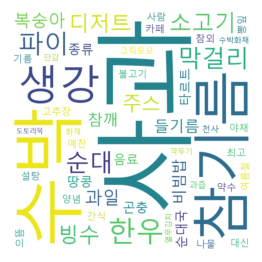

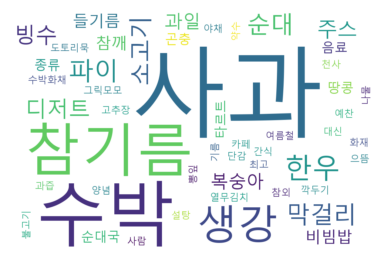

In [2]:
import os
import platform
from wordcloud import WordCloud
from collections import Counter
from kiwipiepy import Kiwi
import matplotlib.pyplot as plt
import pandas as pd
import re
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path)
plt.rc('font', family='Malgun Gothic')

# 텍스트 파일 불러오기(파일명만 변경)
text_file_path = 'data/Q24.txt'
with open(text_file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# 텍스트 정제 함수
def text_clean(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern, '', text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거    
    text = re.sub(pattern, '', text)
    pattern = '([a-zA-Z0-9]+)'   # 알파벳, 숫자 제거  
    text = re.sub(pattern, '', text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern, '', text)
    return text  

text = text_clean(text)

# 형태소 분석기 객체 생성
kiwi = Kiwi()

# 사용자 사전 추가 (sample)
kiwi.add_user_word('맛점', 'NNP', 0)

# 형태소 분석 및 태깅
tagged = kiwi.analyze(text)[0][0]

# 불용어 불러오기
stopwords_path = 'db/Korean Stopwords.txt'
with open(stopwords_path, 'r', encoding='utf-8') as file:
    stopwords = set(file.read().splitlines())

# 추가 불용어 리스트
stopwords_n = { '없음', '울진', '기억안남', '울진군', '그냥', '이유', '기억', '방문', '모름', '없어요'
                '준공',  '사용', '건물', '시설', '발생', '현상', '문제', '사용자', '필요', '공사'
                '예천', '예천군', '경산', '경산시', '예천', '예천군'}
stopwords.update(stopwords_n)

def print_top_nouns(nouns_df, top_n=20):
    """
    명사와 빈도수를 데이터프레임에서 상위 top_n개 출력합니다.
    """
    top_n_df = nouns_df.head(top_n)  # 상위 top_n개의 항목을 선택
    print(f"\n현재 분석된 명사와 빈도수 상위 {top_n}개:")
    print(top_n_df.to_string(index=False))  # 인덱스 없이 출력

def get_additional_stopwords():
    """
    사용자로부터 추가 불용어를 입력받고, 집합으로 반환합니다.
    """
    user_input = input("워드클라우드에서 제외할 키워드를 입력하세요 (종료 시 '끝' 입력): ")
    return set(map(str.strip, user_input.split(',')))

def filter_nouns_with_stopwords(tagged, stopwords):
    """
    현재의 불용어 리스트를 기반으로 명사와 고유명사만 필터링합니다.
    """
    return [(word, tag) for word, tag, *_ in tagged if tag in ('NNG', 'NNP') and word not in stopwords and len(word) > 1]

def generate_wordcloud(nouns_with_tags, output_dir):
    """
    주어진 명사 리스트를 바탕으로 워드클라우드를 다양한 사이즈로 생성하고 저장합니다.
    """
    # 명사와 태그를 결합한 빈도수 계산
    nouns_counter = Counter([word for word, tag in nouns_with_tags])

    # 상위 50개의 명사 추출 및 빈도수 바탕 딕셔너리 생성
    most_common_nouns = nouns_counter.most_common(50)
    nouns_dict = dict(most_common_nouns)

    # 워드클라우드를 기존 사이즈로 생성 (800x800)
    wordcloud = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=800,
        margin=20
    ).generate_from_frequencies(nouns_dict)

    # 가로 8cm, 세로 8cm 크기로 설정 (인치로 변환)
    plt.figure(figsize=(3.15, 3.15))  # 8cm = 3.15인치
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # 그림을 8cm x 8cm 크기로 저장, 빈 공간 제거
    plt.savefig(
        f'{output_dir}/wordcloud(800X800).png',
        dpi=254,
        bbox_inches='tight',  # 여백을 최소화
        pad_inches=0          # 추가 패딩을 없앰
    )
    plt.show()

    # 워드클라우드를 새로운 사이즈로 생성 (1200x800)
    wordcloud = WordCloud(
        font_path=font_path,
        background_color='white',
        width=1200,  # 가로 12cm에 해당하는 픽셀 수
        height=800,   # 세로 8cm에 해당하는 픽셀 수
        margin=20     # 워드클라우드 외곽의 여백을 20
    ).generate_from_frequencies(nouns_dict)

    # 가로 12cm, 세로 8cm 크기로 설정 (인치로 변환)
    plt.figure(figsize=(4.72, 3.15))  # 12cm = 4.72인치, 8cm = 3.15인치
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # 그림을 12cm x 8cm 크기로 저장, 빈 공간 제거
    plt.savefig(
        f'{output_dir}/wordcloud(1200X800).png',
        dpi=254,
        bbox_inches='tight',  # 여백을 최소화
        pad_inches=0          # 추가 패딩을 없앰
    )
    plt.show()

def save_nouns_to_excel(nouns_df, output_path):
    """
    명사와 빈도수를 엑셀 파일로 저장합니다.
    """
    nouns_df.to_excel(output_path, index=False)
    print(f"명사 빈도수가 '{output_path}'에 저장되었습니다.")

# 분석 프로세스 시작
while True:
    # 현재의 불용어 리스트를 기반으로 필터링
    nouns_with_tags = filter_nouns_with_stopwords(tagged, stopwords)

    # 명사와 태그를 결합한 빈도수 계산 및 데이터프레임 생성
    nouns_counter = Counter(nouns_with_tags)
    nouns_data = [(word, tag, count) for (word, tag), count in nouns_counter.most_common()]
    nouns_df = pd.DataFrame(nouns_data, columns=['Noun', 'Tag', 'Frequency']).sort_values(by='Frequency', ascending=False)

    # 명사와 빈도수 상위 20개 출력
    print_top_nouns(nouns_df)

    # 추가 불용어 입력
    user_stopwords = get_additional_stopwords()
    if "끝" in user_stopwords:
        print("불용어 입력을 종료합니다.")
        break
    stopwords.update(user_stopwords)

# 최종 필터링 결과로 엑셀 파일 저장
print("명사 빈도수를 엑셀 파일로 저장합니다...")
file_name = os.path.basename(text_file_path).split('.')[0]
output_dir = f'data/{file_name}'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

excel_output_path = os.path.join(output_dir, f'{file_name}_nouns_frequency.xlsx')
save_nouns_to_excel(nouns_df, excel_output_path)

# 최종 필터링 결과로 워드클라우드 생성
print("최종 워드클라우드를 생성합니다...")
generate_wordcloud(nouns_with_tags, output_dir)
